In [1]:
import numpy as np

In [2]:
class Atom:
    def __init__(self,x,y,z,element,charge,notused,fx,fy,fz):
        self.x=float(x)
        self.y=float(y)
        self.z=float(z)
        self.element=str(element)
        self.charge=float(charge)
        self.notused=int(float(notused))
        self.fx=float(fx)
        self.fy=float(fy)
        self.fz=float(fz)
    
    @classmethod
    def from_lammps(cls, element, x, y, z,notused):
        obj = object.__new__(cls)
        obj.x = float(x)
        obj.y = float(y)
        obj.z = float(z)
        obj.element = str(element)
        obj.notused = notused
        return obj
    
    def scan_vicinity(self,config,cutoff,boxl):
        pivot=np.array([self.x,self.y,self.z])
        config=np.array(config)
        for ind,i in enumerate(config):
            #print(str(ind)+" element= "+i.element,type(i.notused))
            if(i.notused!=0):
                pass
            elif(i.element=="O"):
                i_vector=np.array([i.x,i.y,i.z])
                #print("O at"+str(ind))
                direction=pivot-i_vector
                direction[0]=direction[0]-(boxl*np.round(direction[0]/boxl))
                direction[1]=direction[1]-(boxl*np.round(direction[1]/boxl))
                direction[2]=direction[2]-(boxl*np.round(direction[2]/boxl))
                dist=np.linalg.norm(direction)
                if(dist<cutoff):
                    #can set notused = 1 here. Need to ponder
                    
                    return False
        return True
                

In [3]:
def parse(f_name):
    config=[]
    with open(f_name,'r') as f:
        temp=[]
        for i in f.readlines():
            i=str(i)
            #print(i)
            if("begin" in i):
                temp=[]
            elif("end" in i):
                config.append(temp)
                break # need to remove for a whole file
            elif(i.startswith("atom")):
                a=i.split()
                temp.append(Atom(a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9]))
    #for j in config:
    #    for i in j:
    #        print(i.element,type(i.element))
    return config                  

In [4]:
def parse_lammps_output(f_name):
    atoms=['O','H']
    config=[]
    with open(f_name,'r') as f:
        temp=[]
        for ind,i in enumerate(f.readlines()):
            i=str(i)
            if("ITEM: TIMESTEP" in i):
                if(ind>0):
                    config.append(temp)
                temp=[]
            elif(any(i.startswith(a) for a in atoms)):
                a=i.split()
                #print(a)
                temp.append(Atom.from_lammps(a[0],a[1],a[2],a[3],0))
    return config


In [5]:
def pH(proton_count,boxl,Na):
    print("Proton Count = "+str(proton_count))
    n=proton_count/Na
    vol=1000*(boxl**3)
    #Molarity=n/vol
    #print("molarity=",Molarity)
    return -1*(np.log10(n)-np.log10(vol))

In [21]:
from sys import argv as a
import numpy as np
import matplotlib.pyplot as plt

def main():
    cutoff=1.15 # 2.173185 # needs to be atomic units since the coordinates are in atomic units
    boxl_atomic=46.937#23.465110
    Na=6.0221409e+23
    atomic_to_angstron=0.5291772083
    boxl_angstron=boxl_atomic*atomic_to_angstron
    boxl_meters=boxl_angstron**-8
    
    
    #config=parse("../training-set/input.data")
    config=parse_lammps_output("./out6.lammpstrj")
    #print(config[0])
    
    
    config=config[:100]
    print("config size",np.shape(config))
    protons=[]
    
    
    for ind,j in enumerate(config):
        proton_count=0
        for ind2,i in enumerate(j):
            if(i.element=="H"):
                #print("H at"+str(ind2))
                if(i.scan_vicinity(j,cutoff,boxl_atomic)):
                    proton_count=proton_count+1
                    #print("atom number %d is a proton and the element is %s"%(ind2 ,i.element))
                    #print(i.x,i.y,i.z)
        protons.append(proton_count)
    ph=[]
    for i,prot in enumerate(protons):
        ph_temp=pH(prot,boxl_atomic*(10**-10),Na)
        #print(i,". pH = ",ph_temp)
        ph.append(ph_temp)
    return protons,ph
    
    
    
    #    print("pH of config-"+str(ind)+" = "+str(pH(proton_count,boxl_meters,Na)))

In [23]:
if __name__ == "__main__":
    protons,ph=main()
    protons=np.array(protons)
    ph=np.array(ph)
    print("protons by config= ",protons)
    print("pH by config= ",ph)
 

config size (100, 192)
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 8
Proton Count = 19
Proton Count = 19
Proton Count = 19
Proton Count = 19
Proton Count = 19
Proton Count = 19
Proton Count = 19
Proton Count = 10
Proton Count = 10
Proton Count = 10
Proton Count = 10
Proton Count = 10
Proton Count = 10
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 8
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 7
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 9
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count = 8
Proton Count

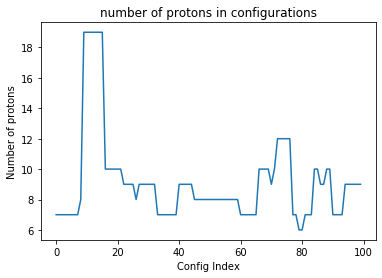

In [24]:
plt.title("number of protons in configurations")
plt.xlabel('Config Index')
plt.ylabel('Number of protons')
plt.plot(np.arange(len(protons)),protons)
plt.show()

(array([ 2., 30., 17., 24., 15.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  7.]),
 array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 <a list of 13 Patch objects>)

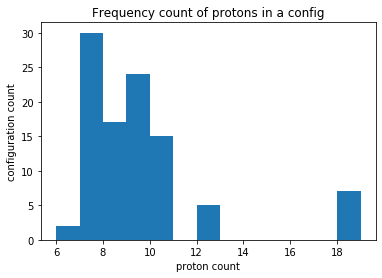

In [25]:
plt.title("Frequency count of protons in a config")
plt.xlabel("proton count")
plt.ylabel("configuration count")
plt.hist(protons, bins=np.arange(protons.min(), protons.max()+1))


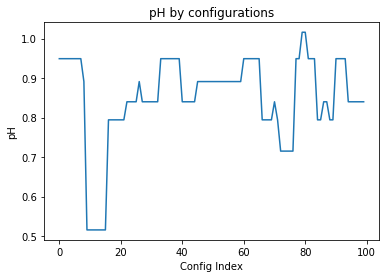

In [26]:
plt.title("pH by configurations")
plt.xlabel('Config Index')
plt.ylabel('pH')
plt.plot(np.arange(len(ph)),ph)
plt.show()

In [ ]:
disassociation const 